In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\Users\\STACY\\Downloads\\train_data_cross-sell.csv", encoding='latin1')
df.rename(columns={'ÿid':'id'}, inplace=True)
df.head()

,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0


#### Sorting names alphabetically

In [6]:
df.sort_values(by='Agent_name', inplace=True)
df.head()

,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
60349,347359018,Male,"Saturday, January 9, 1965",1,NAROK SOUTH,1,2009,No,28265,Achieng Kwamboka,"Friday, November 10, 2023",0
86500,349931875,Female,"Saturday, March 1, 1986",1,KASARANI,0,2013,Yes,32271,Akinyi Chepkorir,"Tuesday, September 12, 2023",0
87013,760803848,Male,"Monday, October 1, 1973",1,KASARANI,0,2017,Yes,2630,Akinyi Chepkorir,"Friday, August 4, 2023",0
84774,576720094,Female,"Monday, September 9, 1985",1,ISINYA,0,2015,Yes,2630,Akinyi Chepkorir,"Thursday, August 24, 2023",0
42123,530807088,Female,"Tuesday, January 23, 1979",1,KASARANI,1,2009,No,2630,Akinyi Chepkorir,"Saturday, April 8, 2023",0


#### Write a function that returns all the performance category of every agent

In [7]:
perfomance_score = df.groupby('Agent_name')['Annual_Premium'].sum().reset_index(name='perfomance_score')
perfomance_score

,Agent_name,perfomance_score
0,Achieng Kwamboka,28265
1,Akinyi Chepkorir,40161
2,Akoth Cherono,179598
3,Anyango Auma,18410
4,Atieno Makena,238417
...,...,...
150,Wanjiku Akoth,72124
151,Wanjiru Atieno,639684
152,Wanjohi Mbuthia,416928
153,Waruiru Muthama,622739


In [9]:
df=df.merge(perfomance_score, on = 'Agent_name')
df.head()

,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response,perfomance_score
0,347359018,Male,"Saturday, January 9, 1965",1,NAROK SOUTH,1,2009,No,28265,Achieng Kwamboka,"Friday, November 10, 2023",0,28265
1,349931875,Female,"Saturday, March 1, 1986",1,KASARANI,0,2013,Yes,32271,Akinyi Chepkorir,"Tuesday, September 12, 2023",0,40161
2,760803848,Male,"Monday, October 1, 1973",1,KASARANI,0,2017,Yes,2630,Akinyi Chepkorir,"Friday, August 4, 2023",0,40161
3,576720094,Female,"Monday, September 9, 1985",1,ISINYA,0,2015,Yes,2630,Akinyi Chepkorir,"Thursday, August 24, 2023",0,40161
4,530807088,Female,"Tuesday, January 23, 1979",1,KASARANI,1,2009,No,2630,Akinyi Chepkorir,"Saturday, April 8, 2023",0,40161


In [10]:
perfomance_quartiles = df['perfomance_score'].quantile([0.25, 0.5, 0.75]).to_dict()
perfomance_quartiles

{0.25: 1997845221.0, 0.5: 2284661069.0, 0.75: 3540111121.0}

In [11]:
def agent_perf_cat(score):
    if score <= perfomance_quartiles[0.25]:
        return 'Low'
    elif score > perfomance_quartiles[0.25] and score <= perfomance_quartiles[0.5]:
        return 'Average'
    else:
        return 'High'
    
# Adding the resulting column to the dataframe

df['perfomance_category'] = df['perfomance_score'].apply(agent_perf_cat)

df[['Agent_name', 'perfomance_score', 'perfomance_category']]

,Agent_name,perfomance_score,perfomance_category
0,Achieng Kwamboka,28265,Low
1,Akinyi Chepkorir,40161,Low
2,Akinyi Chepkorir,40161,Low
3,Akinyi Chepkorir,40161,Low
4,Akinyi Chepkorir,40161,Low
...,...,...,...
324461,Waweru Chege,6208771,Low
324462,Waweru Chege,6208771,Low
324463,Waweru Chege,6208771,Low
324464,Waweru Chege,6208771,Low


#### Plot a histogram of policy holder ages

In [12]:
time_lapsed = pd.Timestamp.now() - pd.to_datetime(df['Customer_Date_of_Birth'])
time_lapsed[:5]

0   21933 days 05:09:01.809118
1   14212 days 05:09:01.809118
2   18746 days 05:09:01.809118
3   14385 days 05:09:01.809118
4   16806 days 05:09:01.809118
Name: Customer_Date_of_Birth, dtype: timedelta64[ns]

In [13]:
# Converting the timedelta np.array to days
time_lapsed.dt.days[:5]

0    21933
1    14212
2    18746
3    14385
4    16806
Name: Customer_Date_of_Birth, dtype: int64

In [16]:
# Converting days to years 
(time_lapsed.dt.days//365)[:5]

0    60
1    38
2    51
3    39
4    46
Name: Customer_Date_of_Birth, dtype: int64

Text(0, 0.5, 'Count')

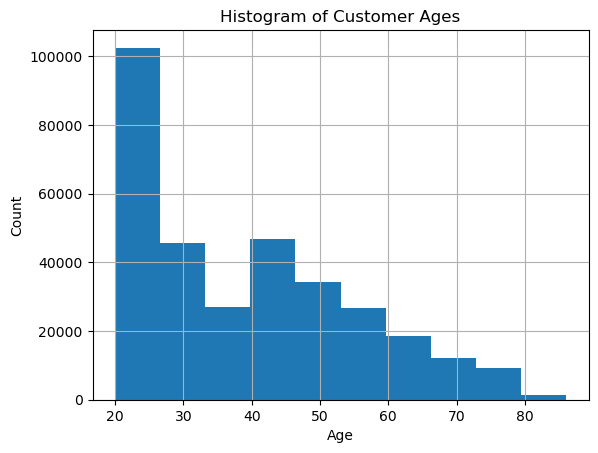

In [22]:
(time_lapsed.dt.days//365).hist()
plt.title("Histogram of Customer Ages")
plt.xlabel('Age')
plt.ylabel('Count')

<AxesSubplot:>

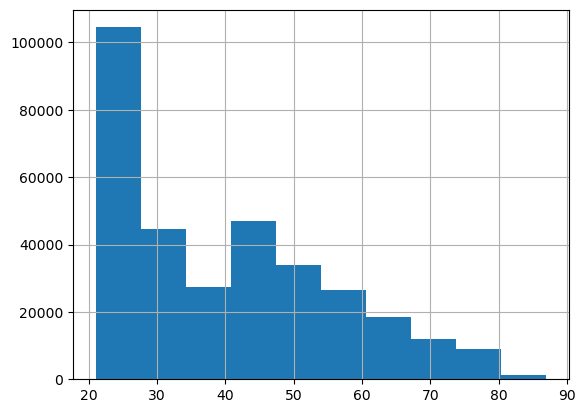

In [7]:
from datetime import datetime
current_time = datetime.now().year
(current_time - pd.to_datetime(df['Customer_Date_of_Birth']).dt.year).hist()

#### Construct a class (Car) in Python with attributes (make, model, and year of manufacture). 

In [23]:
class Car:
    def __init__(self, make, model, year):
        self.make=make
        self.model=model
        self.year=year
    def describe(self):
        print(f"{self.make} {self.model}, {self.year}")

In [24]:
gari1=Car('Toyota', 'Camry', 2020)
print(gari1.describe())
print()
gari2=Car('Honda', 'Civic', 2021)
print(gari2.describe())

Toyota Camry, 2020
None

Honda Civic, 2021
None


#### Formula for line of best fit

Regression or Trend Line
**y  =  mx  +  b**

#### Formulae for median with regards to grouped and ungrouped data.

In [43]:
%%latex
When N is odd the median is the value of the$\frac{N + 1}{2}$ th item.

<IPython.core.display.Latex object>

In [77]:
%%latex
When N is even, the median is the value of the $\frac{\frac{N}{2} + \frac{N + 1}{2}}{2}$

<IPython.core.display.Latex object>

In [107]:
%%latex
For grouped data 
$\\$
For a discrete series:
$\\$
Median = size of $\frac{N + 1}{2}$ th item

<IPython.core.display.Latex object>

In [108]:
%%latex
For grouped data in a continuous series $\\$
Median = $L_{1}$ + $[\frac{\frac{N}{2} - c.f.}{f} ]i $ where $\\$
L1 = lower limit of the median class $\\$

c.f. = cumulative frequency of the class preceding the median class $\\$

f = simple frequency of the median class $\\$

i = class size of the median group or class

<IPython.core.display.Latex object>

### Homoscedasticity

Homoscedasticity, or homogeneity of variances, is an assumption of equal or similar variances in different groups being compared. This is such that the variances along the line of best fit remain similar as you move along the line.


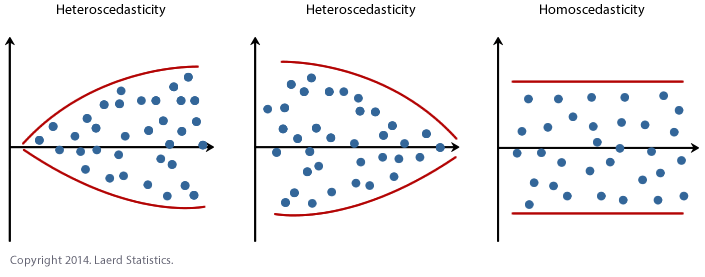

It enhances precision of parameter estimates in regression models and reduces biased standard errors

#### What is the difference between a boxplot and a countplot?

A box plot is used to visualize the distribution of the data while a countplot is used to visualize the frequency of the data.

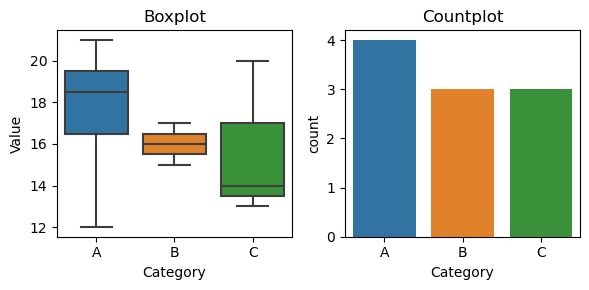

In [110]:
import seaborn as sns
# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'C', 'A', 'C', 'B', 'A', 'C'],
    'Value': [12, 15, 18, 17, 13, 19, 20, 16, 21, 14]
})

# Create a figure to hold both plots
plt.figure(figsize=(6, 3))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Category', y='Value', data=data)
plt.title('Boxplot')

# Countplot
plt.subplot(1, 2, 2)
sns.countplot(x='Category', data=data)
plt.title('Countplot')

# Show the plots
plt.tight_layout()
plt.show()


#### Get the absolute deviation mean using a for loop and a function

In [120]:
def mean_abs_dev(numbers):
    numbers_mean = sum(numbers)/len(numbers)
    deviations = []
    for number in numbers:
        deviations.append(abs(number-numbers_mean))
    return sum(deviations)/len(deviations)
        

In [125]:
numbers=[5,6,7,8,9,11,1,24,62]
mean_abs_dev(numbers)

12.543209876543209

#### Find different percentiles of (my_list) without using libraries

In [141]:
# Sample list
my_list = [0,10,20,30,40,50,60,70,80,90,100]
# Function to obtain quantiles
def get_quantiles(number_list, quantiles):
    return pd.DataFrame(number_list).quantile(quantiles)

get_quantiles(my_list, [0.1,0.7,0.9])

,0
0.1,10.0
0.7,70.0
0.9,90.0


#### What distribution usually has the same mean, median, and mode?
**Symmetric distribution**